# Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
(Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.)

El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


# Introducción

El archivo games se compone de las siguientes columnas:

- `Name`: Nombre del juego.
- `Platform`: Plataforma en la que está disponible el juego (por ejemplo, Wii, NES, GB).
- `Year_of_Release`: Año en que se lanzó el juego.
- `Genre`: Género del juego (como Sports, Platform, Racing).
- `NA_sales`: Ventas en Norteamérica (en millones de dólares).
- `EU_sales`: Ventas en Europa (en millones de dólares).
- `JP_sales`: Ventas en Japón (en millones de dólares).
- `Other_sales`: Ventas en otras regiones (en millones de dólares).
- `Critic_Score`: Puntuación de los críticos (máximo de 100).
- `User_Score`: Puntuación de los usuarios (máximo de 10, pero puede incluir valores como 'tbd').
- `Rating`: Clasificación ESRB (Entertainment Software Rating Board).

**Revisar**: https://packaging.python.org/en/latest/tutorials/packaging-projects/


In [3]:
# Importamos librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datadivecsv import execute_analysis

ModuleNotFoundError: No module named 'datadivecsv'

# 1. Ejecutamos funcion personalizada

llamamos a la funcion execute_analysis para:

1. Corregir los nombres de las columnas
2. Buscar y corregir duplicados (desactivado en este caso)


In [ ]:

df_games = execute_analysis('games.csv', normalize_cols=True, check_duplicates=False,
                            show_summary_flag=False)

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   n_a_sales        16715 non-null  float64
 5   e_u_sales        16715 non-null  float64
 6   j_p_sales        16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df_games.head(10)

,name,platform,year_of_release,genre,n_a_sales,e_u_sales,j_p_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Habiéndose corregido los nombres de las columnas en formato snake_case, procedemos a revisar si el tipo de datos para cada una de las columnas es el que corresponde de acuerdo a la información que contineue.


In [ ]:
# Columnas
for col in df_games.columns:
    print(f"\nColumna: {col}\n")
    print(df_games[col].head(10))
    print(type(df_games[col].iloc[1]))
    print()


Columna: name

0                   Wii Sports
1            Super Mario Bros.
2               Mario Kart Wii
3            Wii Sports Resort
4     Pokemon Red/Pokemon Blue
5                       Tetris
6        New Super Mario Bros.
7                     Wii Play
8    New Super Mario Bros. Wii
9                    Duck Hunt
Name: name, dtype: object
<class 'str'>


Columna: platform

0    Wii
1    NES
2    Wii
3    Wii
4     GB
5     GB
6     DS
7    Wii
8    Wii
9    NES
Name: platform, dtype: object
<class 'str'>


Columna: year_of_release

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
5    1989.0
6    2006.0
7    2006.0
8    2009.0
9    1984.0
Name: year_of_release, dtype: float64
<class 'numpy.float64'>


Columna: genre

0          Sports
1        Platform
2          Racing
3          Sports
4    Role-Playing
5          Puzzle
6        Platform
7            Misc
8        Platform
9         Shooter
Name: genre, dtype: object
<class 'str'>


Columna: n_a_sales

0    41.

# 2. Convierte los datos en los tipos necesarios.

Vemos que la situación de que los tipos de datos no coinciden con los datos que contiene, se da particularmente en la columna `rating`, `year_of_realase`. Y hay que adicionalmente hay que revisar cómo son los datos para las columnas `critic_score`, `user_score`.


In [ ]:
# Vemos que los unicos valores conflictivos es el 'nan'
print(df_games.critic_score.unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


In [ ]:
# Vemos que los valores están en formato str cuando debiera ser de tipo float
print(df_games.user_score.unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [ ]:
coef = len(df_games[df_games['user_score'] == 'tbd']) / \
    len(df_games['user_score'])
print(coef*100)

14.501944361352079


Vemos que los datos son de tipo `str` y que tenemos un valor `tbd` que en este caso, reemplazaremos con NaN, pues, cualquier otro valor podria afectar el cálculo de la media. Podría reemplazarse con la media, pero el valor es incierto, tener un valor arbitrario podría sesgar los resultados si los valores "tbd" no se distribuyen de manera similar a los datos existentes.

Los datos NaN representan un 14% de los valores totales, por los que podemos prescindir de estos por las razones antes expuestas.


**Vemos que:**

- los valores están en formato str cuando debiera ser de tipo float
- existe un valor llamado `tbd` que es el que hace que los valores de esta columna se vayan a float

**¿Qué podemos hacer al respecto?** --> Vemos que el valor 0 ya existe, por lo que debemos tomar otro valor y en este caso estamos tomando el valor `NaN`


In [ ]:
# Convertimos los valores 'tbd' a NaN
df_games['user_score'].replace('tbd', np.nan, inplace=True)

In [ ]:
# Convertir la columna `critic_score` a float
df_games = df_games.astype({'critic_score': 'float64'})

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   n_a_sales        16715 non-null  float64
 5   e_u_sales        16715 non-null  float64
 6   j_p_sales        16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


El reemplazo de los valores `tbd` en la columna user_score por valores NaN es una decisión sustentada pues, en la evidencia de que la información que hay no es suficiente para asignar un valor numérico concreto a estos `tbd`.

Este enfoque es útil por varias razones:

- **Mantiene la Integridad de los Datos**: Al reemplazar `tbd` con NaN, se mantiene la naturaleza numérica de la columna `user_score`, lo cual es importante para el análisis estadístico y las operaciones matemáticas.

- **Evita la Introducción de Sesgos**: Imputar `tbd` con un valor arbitrario (como 0 o el promedio) podría introducir sesgos en el análisis, especialmente si no hay una base sólida para esa imputación.

- **Facilita el Análisis Posterior**: Tratar con NaN es más sencillo en pandas y Python en general. Se puede decidir más tarde cómo manejar estos NaN (por ejemplo, imputación, eliminación, etc.) basándote en el contexto del análisis.

- **Claridad en el Análisis**: Al convertir `tbd` en NaN, queda claro para cualquier persona que revise este análisis que estos valores eran indeterminados en el conjunto de datos original.


### `year_of_release`

El tipo de datos de `year_of_release` aparece como tipo `float` cuando este debiese ser de tipo `int`. Surgen dos opciones para tratar estos datos; la primera, es quitar los `NaN` y hacer el casteo y la segunda, es reemplazar el valor NaN por un valor representativo, en este caso puede ser el valor que más se repite o la media de estos.

**Primero**
Veamos cuántos datos dentro de la columna `year_of_release` aparecen con NaN


In [ ]:
# Calcular el ratio de valores NaN en la columna 'year_of_release'
ratio = len(df_games[df_games['year_of_release'].isna()]
            ) / len(df_games['year_of_release'])

# Imprimir el porcentaje con dos decimales
print(f"{ratio * 100:.2f}%")

1.61%


In [ ]:
# Convertir los valores no enteros y NaN a NaN, y luego a 0 antes de cambiar el tipo a entero
df_games['year_of_release'] = pd.to_numeric(
    # Convierte no numéricos a NaN
    df_games['year_of_release'], errors='coerce')
df_games['year_of_release'] = df_games['year_of_release'].fillna(
    0).astype('int64')        # Rellena NaN con 0 y convierte a int64

El DataFrame resultante tiene todos los valores de `year_of_release` como enteros, con 0 representando los valores originalmente no numéricos o NaN. ​


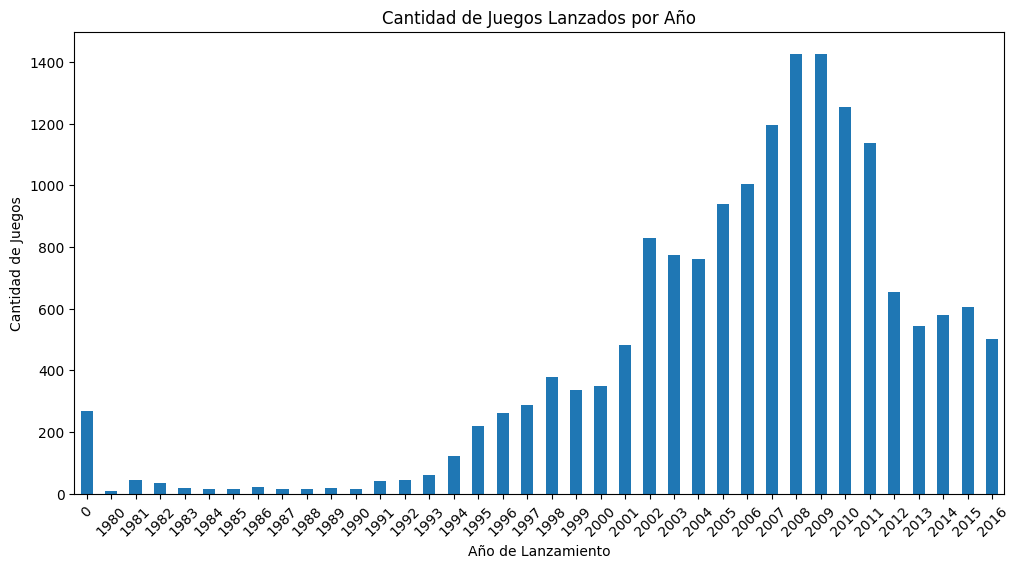

In [ ]:
# Contar la cantidad de juegos por año
juegos_por_año = df_games['year_of_release'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 6))
juegos_por_año.plot(kind='bar')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

## Observaciones

- A partir de la tabla, se evidencia que la cantidad de valores anómalos se representa al inicio del gráfico.
- Que la cantidad de juegos incrementaron progresivamente, pero aumentaron explosivamente a partir del año 2001, sin embargo, volvieron a un valor cercano al de sus inicios en el año 2012.
- Alcanzó valores máximos en el año 2008-2009 y mínimo en 1980.

Habria que revisar qué plataformas son las que más juegos produjeron y qué juegos fueron los más exitosos.


## Variación de ventas por plataforma por año.


<Figure size 1200x600 with 0 Axes>

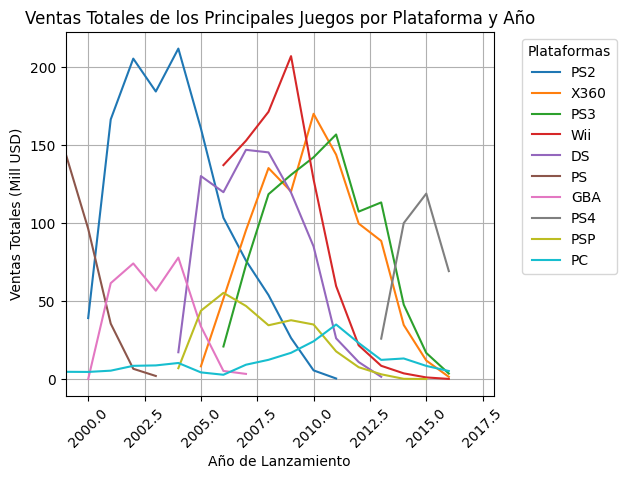

In [ ]:
# Crear la columna 'total_sales' sumando j_p_sales, e_u_sales y n_a_sales
df_games['total_sales'] = df_games['j_p_sales'] + \
    df_games['e_u_sales'] + df_games['n_a_sales'] + df_games['other_sales']

# Crear el pivot table para ventas por plataforma y año
ventas_por_plataforma_año = df_games.pivot_table(index='year_of_release',
                                                 values='total_sales',
                                                 columns='platform',
                                                 aggfunc='sum')

# Sumar ventas totales para cada plataforma a lo largo de los años
ventas_totales_por_plataforma = ventas_por_plataforma_año.sum().sort_values(ascending=False)

# Seleccionar las top N plataformas con mayores ventas totales
top_plataformas = ventas_totales_por_plataforma.head(10).index

# Filtrar el pivot table para incluir solo las top plataformas
ventas_top_plataformas = ventas_por_plataforma_año[top_plataformas]

# Graficar las ventas totales de las top plataformas a lo largo de los años
plt.figure(figsize=(12, 6))
ventas_top_plataformas.plot(kind='line')
plt.title('Ventas Totales de los Principales Juegos por Plataforma y Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (Mill USD)')
plt.xticks(rotation=45)
plt.legend(title='Plataformas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Ajustar los límites del eje X
plt.xlim(1999, 2018)
plt.grid()

plt.show()

## <u>Observaciones</u>

A partir del gráfico se evidencia que las plataformas muestran una vida media de aproximadamente 7-10 años. Esto se puede apreciar pues, las graficas se van haciendo populares, alcanzar un máximo en torno al cual oscilan, pero finalmente decaen al cabo de ese tiempo.

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

### 1. ¿Cuáles son los principales problemas que se deben abordar en el diseño y construcción del proyecto

Tomamos en consideración los datos que van desde el 2000-2017 pues, es a partir de ese año que se observa un incremento de las ventas, teniendo como tope el año 2016 como último registro de datos. Se trabajó con `xlim` hasta el 2017 por un tema de optimizar la visualización de los registros.

### 2. ¿Qué plataformas son líderes en ventas?

Las plataformas más populares fueron `PS2` y `Wii`, y las menos populares `XB` y `PSP`, sin embargo, se aprecia que la vida media de la PSP fue mayor a la usual.

Se pueden observar transiciones entre las generaciones de consolas. Por ejemplo, el declive en las ventas de la PS2 coincide con un aumento en las ventas de la PS3, lo que sugiere un cambio de los consumidores de una generación de consolas a la siguiente.

En complemento a lo anteriormente expuesto podemos señalar que si bien la plataforma `pc` no alcanza ventas considerablemente altas, si se tiene que estas son constantes y desafían la vida media de las otras plataformas con una tendencia al alza a partir del año 2006 con un máximo en el año 2011. Sería interesante ver qué se hizo de diferente ese año como para que tuviera ese máximo.

<!-- Elige varias plataformas potencialmente rentables. -->


## Distribución de datos

<!-- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores. -->


In [ ]:
# Lista para almacenar los datos de cada plataforma para el boxplot
data_to_plot = [ventas_top_plataformas[platform].dropna()
                for platform in ventas_top_plataformas]

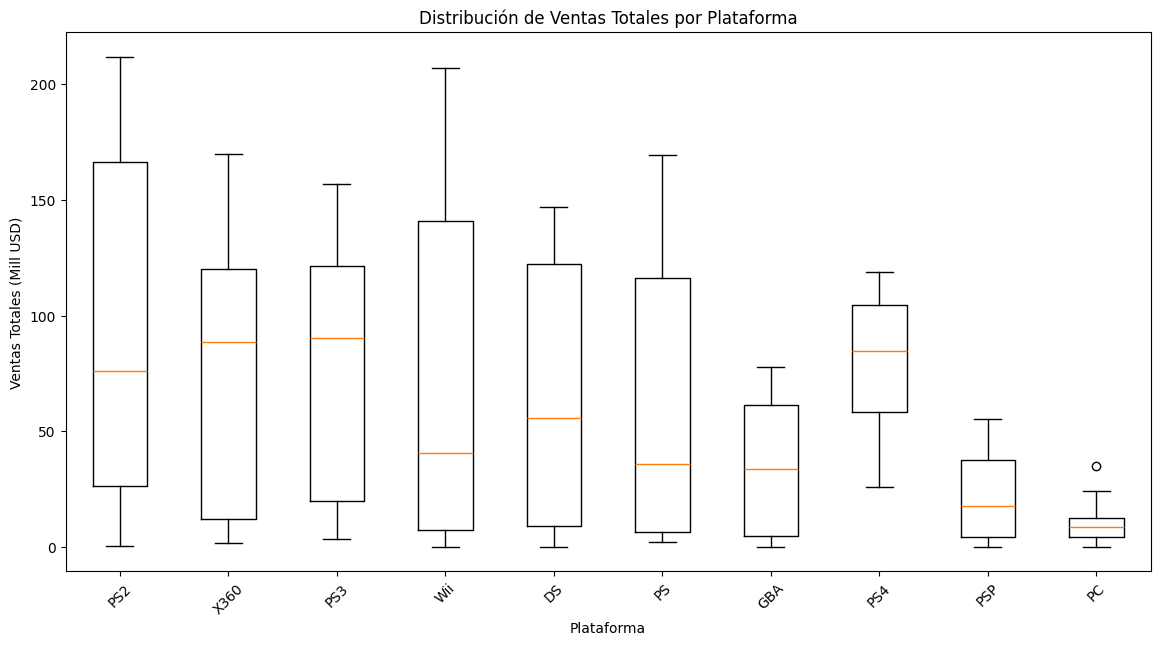

In [ ]:
# Crear el gráfico de caja
plt.figure(figsize=(14, 7))
plt.boxplot(data_to_plot)

# Establecer las etiquetas del eje x con los nombres de las plataformas
plt.xticks(range(1, len(ventas_top_plataformas.columns) + 1),
           ventas_top_plataformas.columns, rotation=45)

# Títulos y etiquetas
plt.title('Distribución de Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (Mill USD)')
plt.show()

## <u>Observaciones</u>

<!-- ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos. -->

Vemos diferencias considerables en la distribución de ingresos en las plataformas. Plataformas con ingresos con maximos considerables, tienen medianas muy por lo bajo de plataformas antiguas,
En base al gráfico de boxplot proporcionado, que muestra la distribución de las ventas totales por plataforma, se pueden observar varios puntos interesantes:

- **Rango de Ventas**: Cada boxplot muestra una amplia variación en las ventas totales por plataforma, con algunos rangos que son bastante amplios, lo que indica una gran variabilidad en las ventas de juegos individuales en esa plataforma.La mediana de las ventas totales para esas plataformas, representada por la linea naranja, es más altas que otras, lo que sugiere que en general, los títulos en esas plataformas tienden a vender más que en otras.

  Algunas plataformas, como PS2 y X360, muestran una mediana más alta y un rango intercuartil más grande, lo que sugiere que tienen un número más alto de ventas en general. En contraste, plataformas como PSP y XB tienen medianas más bajas y rangos intercuartiles más pequeños, lo que sugiere menores ventas.

  Plataformas como la PS4 parecen tener una mediana más baja en comparación con algunas consolas más antiguas, lo que podría ser indicativo de que en el período considerado para el gráfico, la PS4 estaba todavía en sus primeras etapas. Sin embargo, esto también podría ser el resultado de la competencia con otros medios digitales o plataformas.

  La longitud de los "bigotes" en los boxplots puede indicar la consistencia de las ventas. Un "bigote" más corto sugiere que la mayoría de los juegos en esa plataforma venden una cantidad de unidades más consistente, mientras que "bigotes" más largos sugieren una mayor variabilidad.

- **Outliers**: Para la gran mayoría de las plataformas no hay puntos que representen valores atípicos u outliers visibles en el gráfico, lo que podría indicar que no hay juegos extremadamente exitosos o fallidos en comparación con el promedio de ventas en cada plataforma, sin embargo, si vemos un punto de este estilo para `pc`, lo que podría explicar el peak alcanzado en 2011, no obstante, para ello hay que hacer un estudio más acusioso.

Es importante tener en cuenta que este análisis se basa únicamente en la visualización y que para un análisis más profundo se podría requerir la revisión de los datos subyacentes y considerar otros factores del mercado, como el tamaño del mercado en ese momento, la cantidad de juegos lanzados y el ciclo de vida de la plataforma.


## <u>Análisis de juegos según calificación de usuarios.</u>

<!-- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones. -->


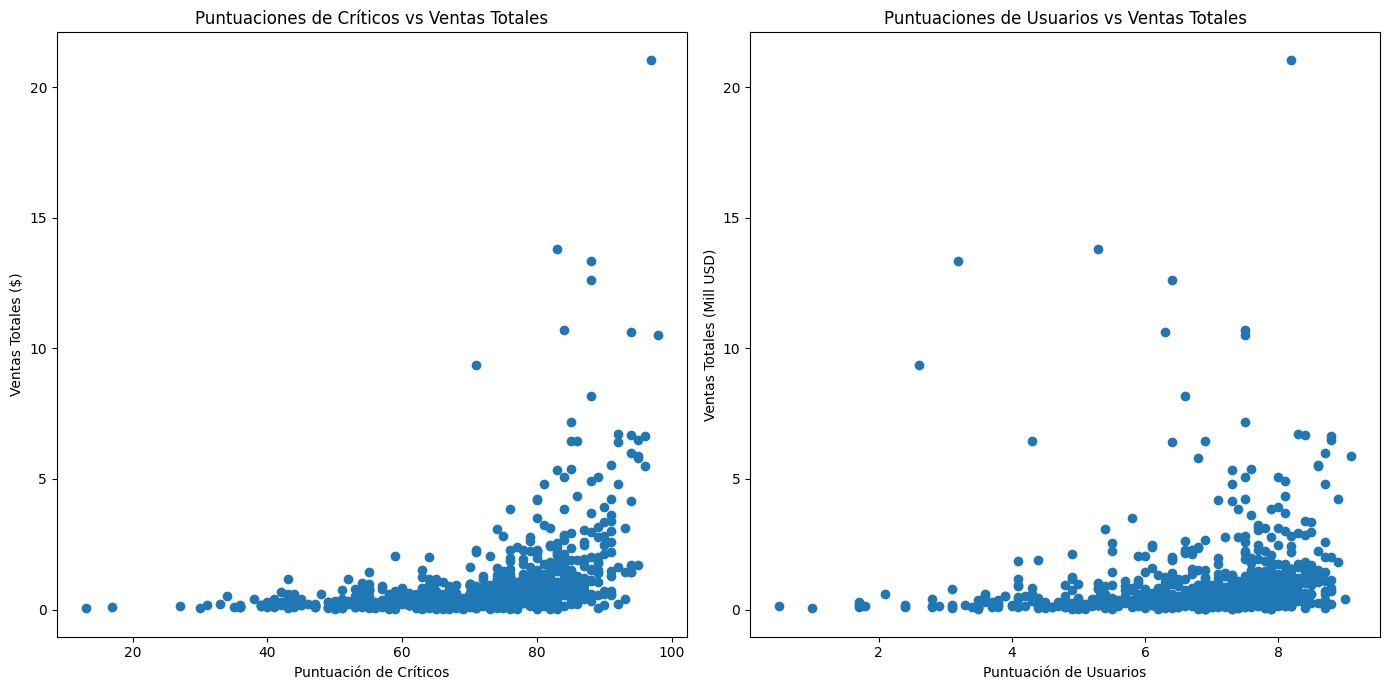

Coeficiente de correlación entre las puntuaciones de críticos y ventas totales: 0.43
Coeficiente de correlación entre las puntuaciones de usuarios y ventas totales: 0.14


In [ ]:
ps3_games = df_games[df_games['platform'] == 'PS3']

# Asegurarse de que las puntuaciones están en formato numérico y no contienen 'tbd'
ps3_games = ps3_games.replace('tbd', np.nan).dropna(
    subset=['user_score', 'critic_score'])
ps3_games['user_score'] = ps3_games['user_score'].astype('float')
ps3_games['critic_score'] = ps3_games['critic_score'].astype('float')

# Configurar los subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
plt.grid()

# Gráfico de dispersión para las puntuaciones de críticos y ventas totales
ax[0].scatter(ps3_games['critic_score'], ps3_games['total_sales'])
ax[0].set_title('Puntuaciones de Críticos vs Ventas Totales')
ax[0].set_xlabel('Puntuación de Críticos')
ax[0].set_ylabel('Ventas Totales ($)')

# Gráfico de dispersión para las puntuaciones de usuarios y ventas totales
ax[1].scatter(ps3_games['user_score'], ps3_games['total_sales'])
ax[1].set_title('Puntuaciones de Usuarios vs Ventas Totales')
ax[1].set_xlabel('Puntuación de Usuarios')
ax[1].set_ylabel('Ventas Totales (Mill USD)')

# Mostrar el layout ajustado
plt.grid()
plt.tight_layout()
plt.show()

# Calcular el coeficiente de correlación de Pearson
critic_corr = ps3_games['critic_score'].corr(ps3_games['total_sales'])
user_corr = ps3_games['user_score'].corr(ps3_games['total_sales'])

print(f"Coeficiente de correlación entre las puntuaciones de críticos y ventas totales: {
      critic_corr:.2f}")
print(f"Coeficiente de correlación entre las puntuaciones de usuarios y ventas totales: {
      user_corr:.2f}")

## <u>Observaciones</u>

Los gráficos de dispersión nos permiten visualizar la relación entre las puntuaciones y las ventas, mientras que los coeficientes de correlación proporcionan un valor numérico para entender la fuerza y la dirección de la relación lineal entre las puntuaciones y las ventas.

Veamos como se pueden interpretar los resultados tanto del gráfico, como del coeficiente de correlación:

- **Coeficiente de correlación de críticos de 0.43**: Esto sugiere una correlación positiva moderada entre las puntuaciones de los críticos y las ventas totales. Significa que, en general, a medida que las puntuaciones de los críticos mejoran, también lo hacen las ventas de los juegos. Sin embargo, la relación no es muy fuerte, lo que indica que otros factores además de las puntuaciones de los críticos pueden influir en las ventas de los juegos. Un buen análisis sería determinar como afecta la clasificación y el precio de los juegos, en relación al % de ventas.

- **Coeficiente de correlación de usuarios de 0.14**: Este valor indica una correlación positiva muy débil entre las puntuaciones de los usuarios y las ventas totales. Esto implica que hay una tendencia muy ligera a que las ventas aumenten con mejores puntuaciones de los usuarios, pero la relación es lo suficientemente débil como para sugerir que las puntuaciones de los usuarios no son un predictor confiable de las ventas.

- **Influencia de las reseñas de críticos**: Las puntuaciones de los críticos parecen tener una influencia mayor en las ventas en comparación con las puntuaciones de los usuarios. Esto podría deberse a que las reseñas de críticos son vistas como más confiables o influyentes por los consumidores potenciales al momento de tomar decisiones de compra, sea de parte de personas inmersas en el mundo o personas que se introducen a este y buscan tener alguna referencia. También es posible que las reseñas de críticos se publiquen antes del lanzamiento de un juego y, por lo tanto, tengan un impacto más directo en las decisiones de compra anticipadas.

- **Importancia relativa de las reseñas de usuarios**: Las puntuaciones de los usuarios tienen una correlación mucho más baja con las ventas, lo que sugiere que mientras que las opiniones de los usuarios pueden afectar la percepción del juego, tienen un impacto mucho menor en la decisión de compra de la mayoría de los consumidores. Esto también podría reflejar el hecho de que las puntuaciones de los usuarios suelen recopilarse después de que las ventas iniciales ya han tenido lugar.

Estos resultados pueden ser útiles para editores y desarrolladores al considerar cómo las puntuaciones podrían influir en las ventas, y al diseñar estrategias de marketing y desarrollo de juegos. Sin embargo, siempre deben ser tomados en contexto y junto con el análisis de otros datos y tendencias del mercado.


## <u>Juegos a través de plataformas</u>

<!-- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas? -->


In [ ]:
# Paso 1: Identificar juegos multiplataforma
juegos_multiplataforma = df_games.groupby('name').platform.nunique()
juegos_multiplataforma = juegos_multiplataforma[juegos_multiplataforma > 1]

# Paso 2: Agrupar ventas por juego y plataforma
ventas_juego_plataforma = df_games[df_games['name'].isin(juegos_multiplataforma.index)].groupby([
    'name', 'platform']).total_sales.sum().reset_index()

C:\Users\aldon\AppData\Local\Temp\ipykernel_24340\232493525.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


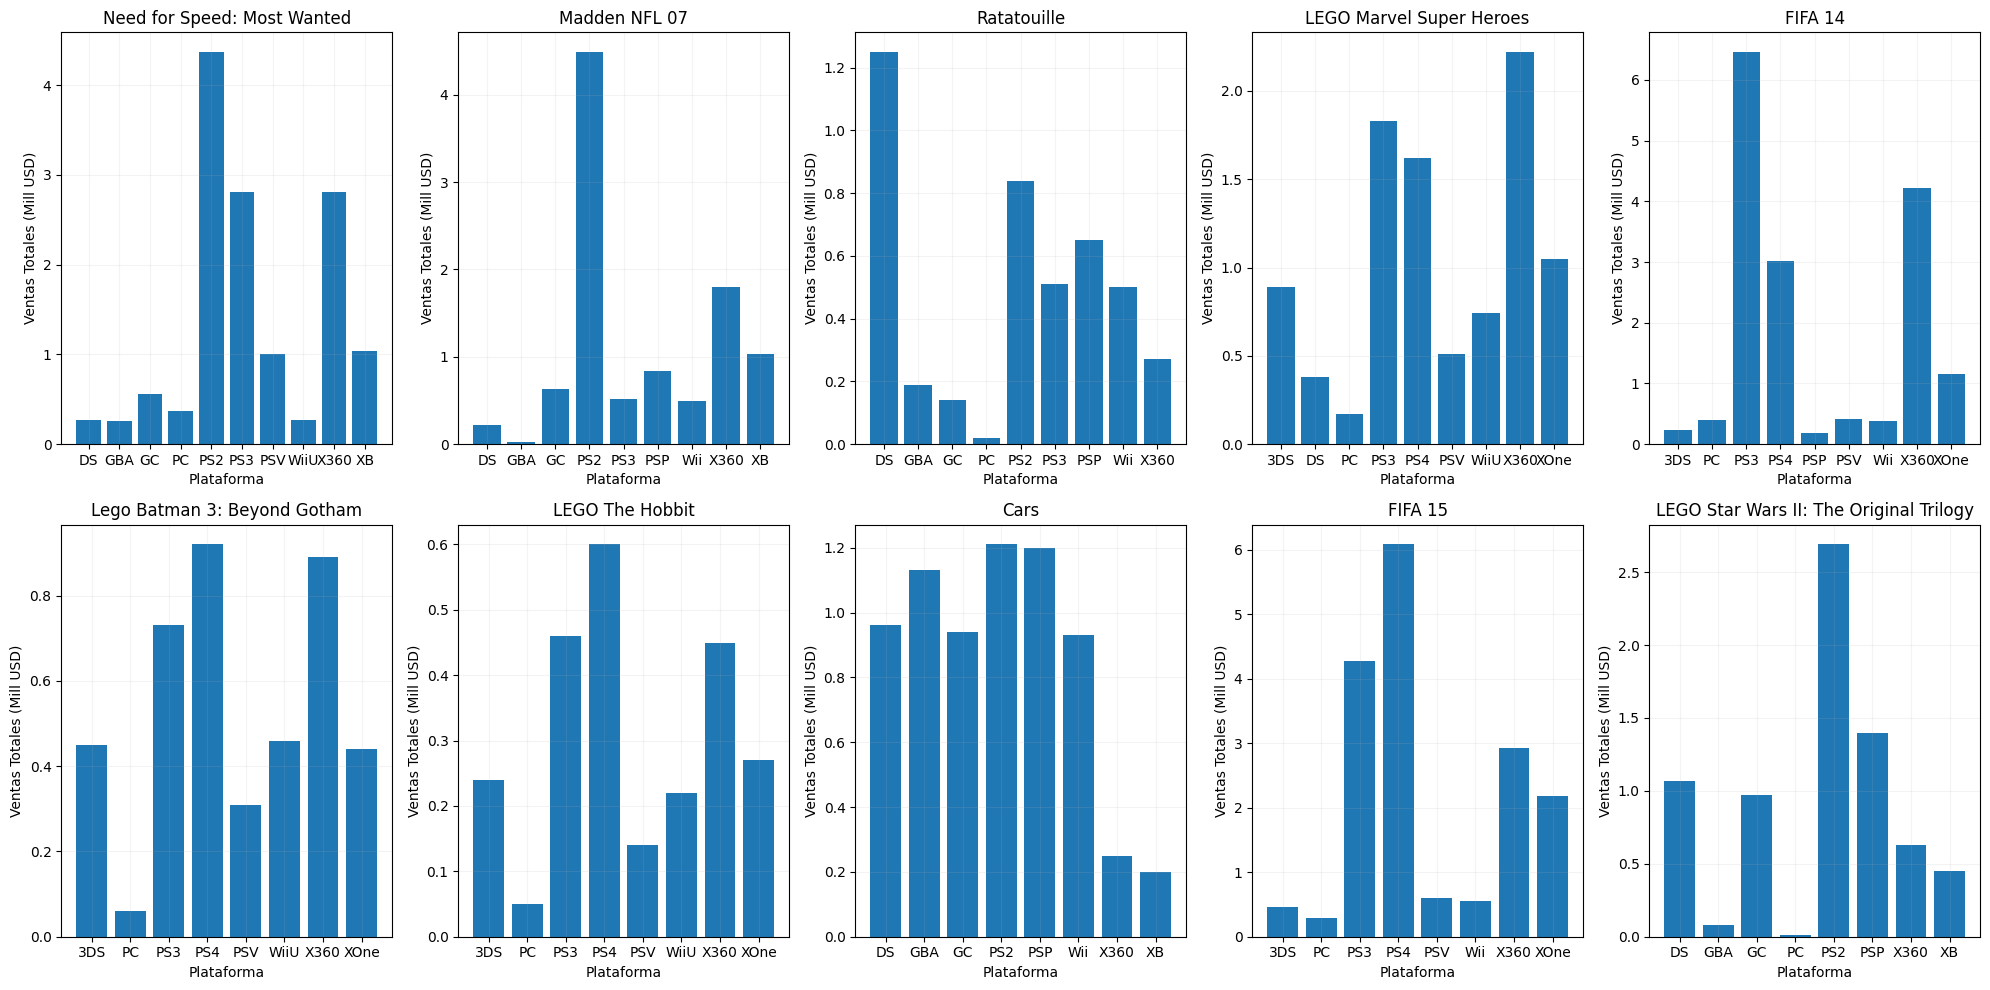

In [ ]:
# Paso 3: Analizar las ventas por juego en cada plataforma
list_of_games = juegos_multiplataforma.sort_values(ascending=False).head(10)

# Configurar la figura y los ejes para los subplots con 2 filas y 5 columnas
fig, axes = plt.subplots(2, 5, figsize=(20, 10), constrained_layout=True)

# Aplanar el array de ejes para facilitar el acceso en un bucle
axes = axes.flatten()

# Bucle para graficar cada juego en un subplot
for i, game in enumerate(list_of_games.index):
    # Filtrar el DataFrame para el juego actual
    ventas_juego_especifico = ventas_juego_plataforma[ventas_juego_plataforma['name'] == game]
    # Crear el gráfico de barras para el juego actual en el i-ésimo subplot
    axes[i].bar(ventas_juego_especifico['platform'],
                ventas_juego_especifico['total_sales'])
    # Establecer el título y las etiquetas de los ejes
    axes[i].set_title(game)
    axes[i].set_xlabel('Plataforma')
    axes[i].set_ylabel('Ventas Totales (Mill USD)')
    # Añadir grillas para mejor visualización
    axes[i].grid(True, alpha=0.15)

# Ajustar la disposición de los subplots para evitar que se solapen los títulos y etiquetas
plt.tight_layout()

# Paso 4: Visualizar los resultados
plt.show()

## <u>Observaciones</u>

<!-- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas. -->

A partir de los gráficos de barras proporcionados, podemos destacar 3 puntos clave:

- **Diferencias de Ventas por Plataforma**: Cada juego muestra un patrón de ventas diferente a través de las plataformas. Algunos juegos venden más en ciertas plataformas que en otras, lo que podría estar influenciado por la popularidad de la plataforma, la base de usuarios o la compatibilidad y el rendimiento del juego en esa plataforma en particular.

- **Éxitos Multiplataforma**: Juegos como "FIFA 14" y "FIFA 15" muestran ventas significativas en múltiples plataformas, lo que sugiere un fuerte atractivo multiplataforma y una marca bien establecida que atrae a jugadores en diferentes dispositivos.

- **Tendencias de Ventas**: Algunas plataformas más antiguas como PS2 y GBA muestran ventas menores o nulas en comparación con plataformas más modernas como PS4 y Xbox One, lo que refleja el cambio generacional en la tecnología de juegos y las preferencias de los consumidores.


## <u>Juegos por género</u>

<!-- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas? -->


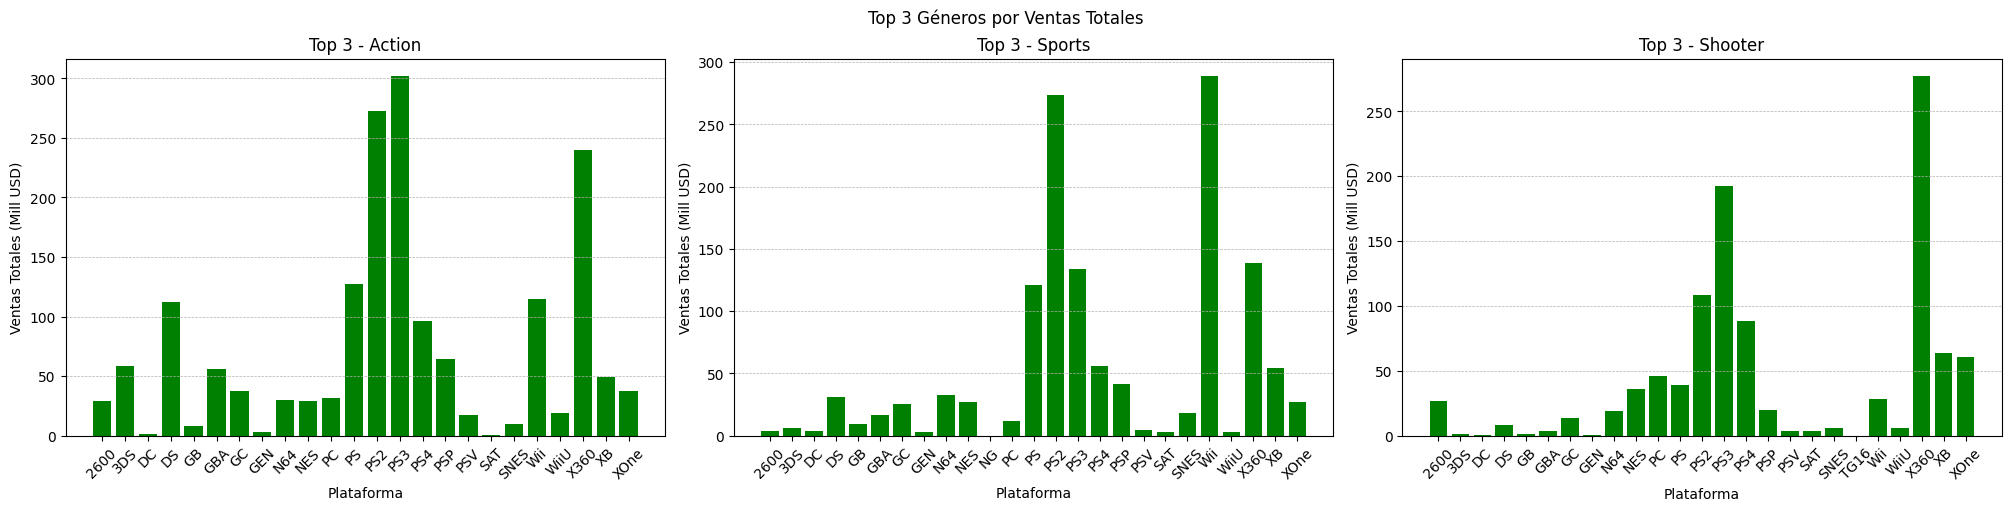

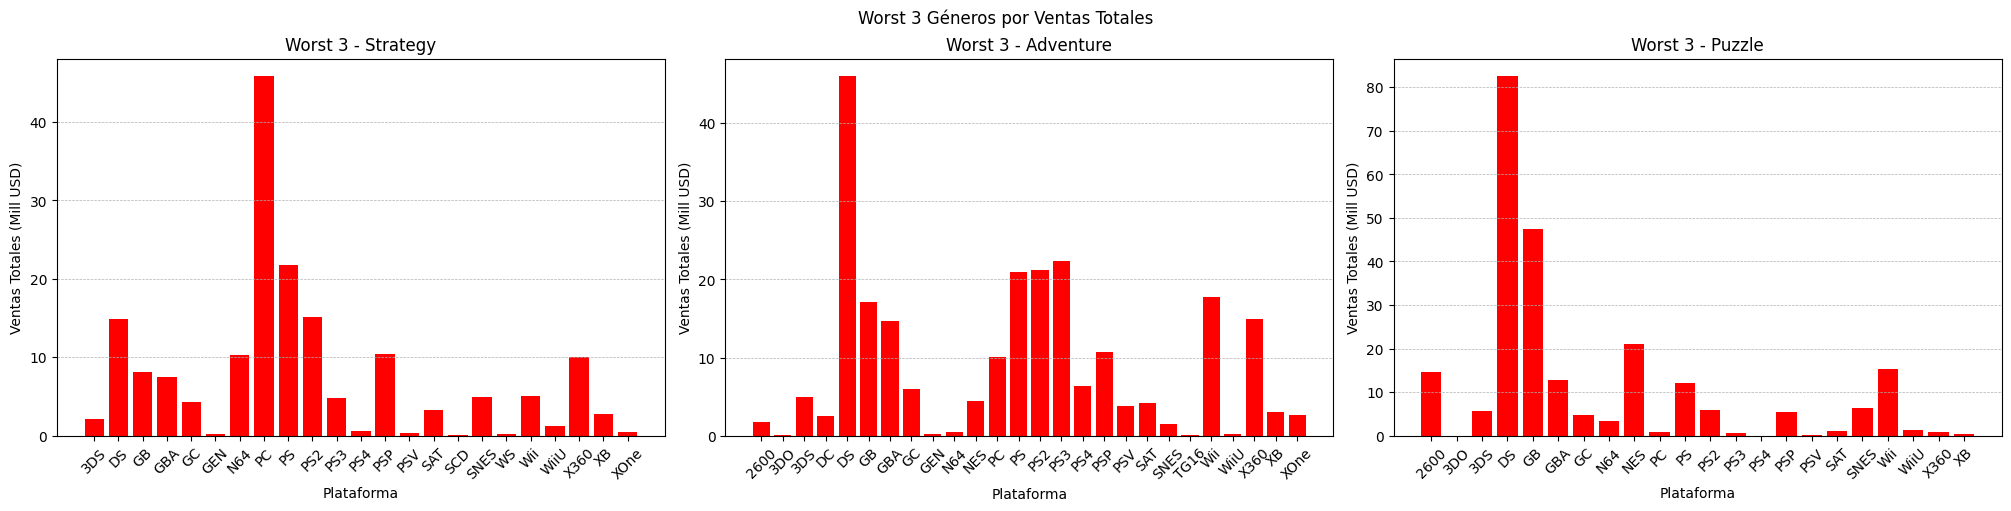

In [ ]:
# Agrupar las ventas por género y plataforma
ventas_por_genero_plataforma = df_games.pivot_table(
    index='platform',
    columns='genre',
    values='total_sales',
    aggfunc='sum'
)

# Obtener los 3 géneros con mayores ventas y los 3 con menores ventas
top_3_generos = ventas_por_genero_plataforma.sum().nlargest(3).index
bottom_3_generos = ventas_por_genero_plataforma.sum().nsmallest(3).index

# Crear un gráfico para los Top 3 géneros
fig, axes = plt.subplots(1, 3, figsize=(20, 5), constrained_layout=True)
for i, genre in enumerate(top_3_generos):
    ventas_genero = ventas_por_genero_plataforma[genre].dropna()
    axes[i].bar(ventas_genero.index, ventas_genero.values, color='green')
    axes[i].set_title(f'Top 3 - {genre}')
    axes[i].set_xlabel('Plataforma')
    axes[i].set_ylabel('Ventas Totales (Mill USD)')
    axes[i].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
    # Rotación de las etiquetas del eje x
    axes[i].tick_params(axis='x', rotation=45)
plt.suptitle('Top 3 Géneros por Ventas Totales')
plt.show()

# Crear un gráfico para los Worst 3 géneros
fig, axes = plt.subplots(1, 3, figsize=(20, 5), constrained_layout=True)
for i, genre in enumerate(bottom_3_generos):
    ventas_genero = ventas_por_genero_plataforma[genre].dropna()
    axes[i].bar(ventas_genero.index, ventas_genero.values, color='red')
    axes[i].set_title(f'Worst 3 - {genre}')
    axes[i].set_xlabel('Plataforma')
    axes[i].set_ylabel('Ventas Totales (Mill USD)')
    axes[i].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
    # Rotación de las etiquetas del eje x
    axes[i].tick_params(axis='x', rotation=45)
plt.suptitle('Worst 3 Géneros por Ventas Totales')
plt.show()

- **Top 3 Géneros por Ventas Totales:**

  - _Action_: 1744.17 millones de dólares.
  - _Sports_: 1331.27 millones de dólares.
  - _Shooter_: 1052.45 millones de dólares.

- **Bottom 3 Géneros por Ventas Totales**:
  - _Puzzle_: 242.57 millones de dólares.
  - _Adventure_: 237.59 millones de dólares.
  - _Strategy_: 174.23 millones de dólares.

Basándome en los gráficos proporcionados, aquí hay tres puntos clave que podemos mencionar:

1. En los géneros más vendidos, ciertas plataformas destacan con ventas significativamente más altas en comparación con otras. Esto puede indicar una combinación de una base de usuarios activa y una preferencia por ciertos géneros en plataformas específicas.

2. Los géneros con peores ventas muestran picos menos pronunciados en las ventas, lo que indica una popularidad más limitada o una distribución más estrecha en términos de plataformas. También puede reflejar una menor inversión en marketing o desarrollo para esos géneros.

3. Existen plataformas que se especializan o son más asociadas con ciertos géneros, lo que se refleja en mayores ventas. Por ejemplo, las consolas pueden tener mejores ventas en géneros como acción y deportes, mientras que las plataformas de PC pueden destacar en estrategia o aventuras.

Estas observaciones pueden proporcionar información valiosa para los desarrolladores y editores de juegos al planificar lanzamientos futuros y estrategias de marketing y concentrar de mejor manera los recursos de acuerdo al género y la plataforma en que tuvo mayor incidencia a lo largo de los años.


- **Géneros Más Rentables**: Los géneros más rentables, como Acción, Deportes y Shooters, suelen estar bien representados en todas las plataformas principales. Estos géneros a menudo tienen títulos de gran presupuesto y franquicias establecidas con seguidores fieles.

Estos géneros también tienden a recibir una inversión significativa en términos de desarrollo y marketing, lo que aumenta su visibilidad y, por lo tanto, sus ventas.
Suelen ser más atractivos para un público amplio, lo que les permite alcanzar y mantener altos niveles de rentabilidad.

- **Géneros con Ventas Altas**: Los géneros con altas ventas tienden a ser aquellos que ofrecen experiencias de juego intensas y emocionalmente atractivas, como los juegos de Acción y Aventura, o aquellos que permiten competiciones y cooperación, como Deportes y Shooters.

Estos géneros suelen ser más adaptables a las tendencias de juego en línea y a menudo incluyen modos multijugador, lo que puede prolongar la vida útil de un juego y, por tanto, aumentar las ventas a lo largo del tiempo.

- **Géneros con Ventas Bajas:** Los géneros con ventas más bajas a menudo tienen mercados más específicos o nichos. Por ejemplo, los juegos de Estrategia y Puzzle pueden tener una base de fans apasionada pero más pequeña comparada con géneros masivos como Acción o Deportes.

Estos géneros pueden no recibir tanta atención en términos de presupuesto de desarrollo o marketing, lo que puede limitar su alcance y visibilidad en el mercado Además, pueden estar más ligados a plataformas específicas que tienen una base de usuarios más orientada hacia esos géneros, como los juegos de Estrategia en PC.

Es importante tener en cuenta que estas generalizaciones se basan en tendencias comunes y pueden tener excepciones. Factores como la calidad del juego, la innovación, el timing de lanzamiento, la oferta de juegos del mismo género y la lealtad de la marca también juegan un papel crucial en el éxito de ventas de un género.


## <u>Segmentación de usuarios</u>


In [ ]:
# Paso 1: Agrupar las ventas por plataforma en cada región
na_sales = df_games.groupby('platform')['n_a_sales'].sum(
).sort_values(ascending=False).head(5)
eu_sales = df_games.groupby('platform')['e_u_sales'].sum(
).sort_values(ascending=False).head(5)
jp_sales = df_games.groupby('platform')['j_p_sales'].sum(
).sort_values(ascending=False).head(5)

# Paso 2: Crear DataFrames para las ventas por región y combinarlos
top_na_platforms = na_sales.reset_index().rename(columns={'NA_sales': 'Sales'})
top_eu_platforms = eu_sales.reset_index().rename(columns={'EU_sales': 'Sales'})
top_jp_platforms = jp_sales.reset_index().rename(columns={'JP_sales': 'Sales'})

In [ ]:
# Puedes imprimir los DataFrames para ver las plataformas top en cada región.
print("Top 5 Platforms in NA:\n", top_na_platforms)
print("\nTop 5 Platforms in EU:\n", top_eu_platforms)
print("\nTop 5 Platforms in JP:\n", top_jp_platforms)

Top 5 Platforms in NA:
   platform  n_a_sales
0     X360     602.47
1      PS2     583.84
2      Wii     496.90
3      PS3     393.49
4       DS     382.40

Top 5 Platforms in EU:
   platform  e_u_sales
0      PS2     339.29
1      PS3     330.29
2     X360     270.76
3      Wii     262.21
4       PS     213.61

Top 5 Platforms in JP:
   platform  j_p_sales
0       DS     175.57
1       PS     139.82
2      PS2     139.20
3     SNES     116.55
4      3DS     100.67


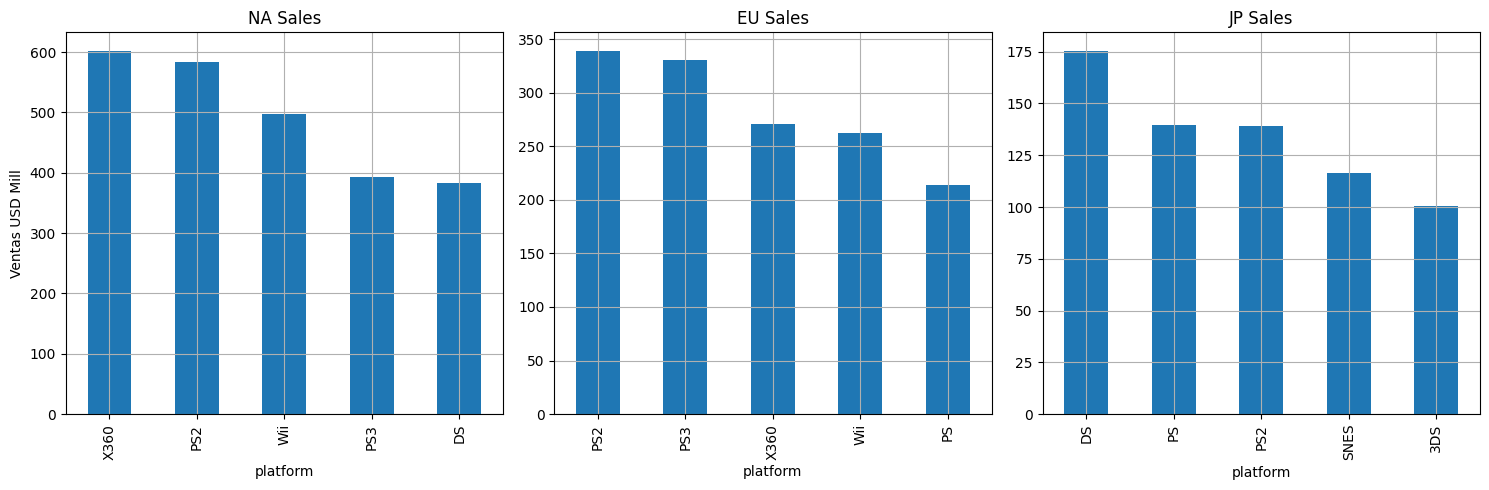

In [ ]:
# Para visualizar estas variaciones, podrías usar gráficos de barras.
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

top_na_platforms.plot(kind='bar', x='platform', y='n_a_sales',
                      ax=ax[0], title='NA Sales', legend=False, grid=True, ylabel='Ventas USD Mill')
top_eu_platforms.plot(kind='bar', x='platform', y='e_u_sales',
                      ax=ax[1], title='EU Sales', legend=False, grid=True)
top_jp_platforms.plot(kind='bar', x='platform', y='j_p_sales',
                      ax=ax[2], title='JP Sales', legend=False, grid=True)

plt.tight_layout()
plt.show()

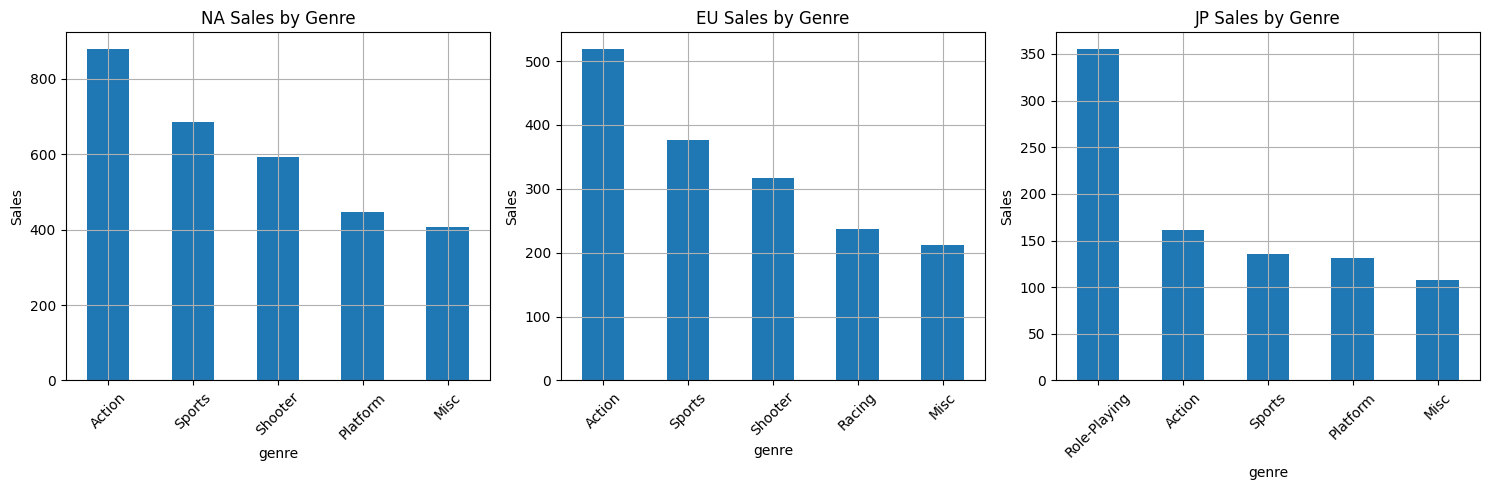

In [ ]:
# Paso 1: Agrupar las ventas por género en cada región y sumar
na_sales_by_genre = df_games.groupby(
    'genre')['n_a_sales'].sum().sort_values(ascending=False).head(5)
eu_sales_by_genre = df_games.groupby(
    'genre')['e_u_sales'].sum().sort_values(ascending=False).head(5)
jp_sales_by_genre = df_games.groupby(
    'genre')['j_p_sales'].sum().sort_values(ascending=False).head(5)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))


na_sales_by_genre.plot(
    kind='bar', ax=ax[0], title='NA Sales by Genre', legend=False, grid=True)
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x', rotation=45)

eu_sales_by_genre.plot(
    kind='bar', ax=ax[1], title='EU Sales by Genre', legend=False, grid=True)
ax[1].set_ylabel('Sales')
ax[1].tick_params(axis='x', rotation=45)

jp_sales_by_genre.plot(
    kind='bar', ax=ax[2], title='JP Sales by Genre', legend=False, grid=True)
ax[2].set_ylabel('Sales')
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

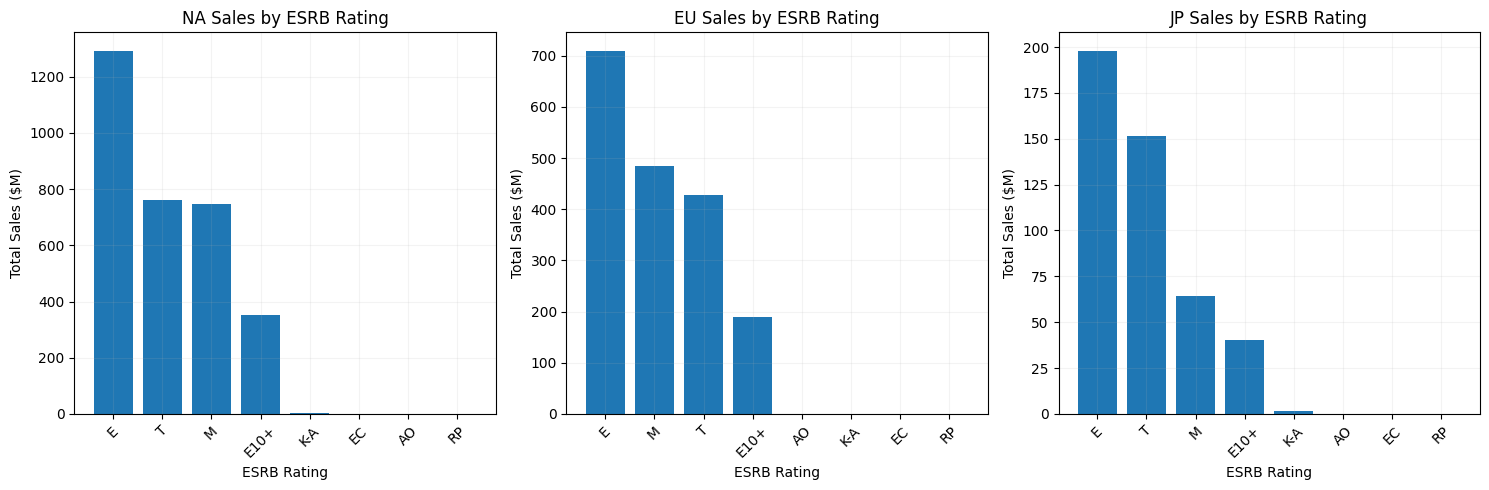

In [ ]:
# Agrupar las ventas por clasificación ESRB en cada región
na_rating = df_games.groupby(
    'rating')['n_a_sales'].sum().sort_values(ascending=False)
eu_rating = df_games.groupby(
    'rating')['e_u_sales'].sum().sort_values(ascending=False)
jp_rating = df_games.groupby(
    'rating')['j_p_sales'].sum().sort_values(ascending=False)

# Crear un gráfico para visualizar las ventas por clasificación ESRB en cada región
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico para Norteamérica
ax[0].bar(na_rating.index, na_rating.values)
ax[0].set_title('NA Sales by ESRB Rating')
ax[0].set_xlabel('ESRB Rating')
ax[0].set_ylabel('Total Sales ($M)')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(alpha=0.15)

# Gráfico para Europa
ax[1].bar(eu_rating.index, eu_rating.values)
ax[1].set_title('EU Sales by ESRB Rating')
ax[1].set_xlabel('ESRB Rating')
ax[1].set_ylabel('Total Sales ($M)')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(alpha=0.15)

# Gráfico para Japón
ax[2].bar(jp_rating.index, jp_rating.values)
ax[2].set_title('JP Sales by ESRB Rating')
ax[2].set_xlabel('ESRB Rating')
ax[2].set_ylabel('Total Sales ($M)')
ax[2].tick_params(axis='x', rotation=45)
ax[2].grid(alpha=0.15)

# Ajustar la disposición de los subplots para evitar solapamientos
plt.tight_layout()
plt.show()

### <u>Observaciones</u>

Las imagenes muestran una comparación de las ventas totales de videojuegos tanto por plataforma como por género en tres regiones clave: Norteamérica (NA), Europa (EU) y Japón (JP). En la primera imagen, que muestra las ventas por plataforma, observamos que ciertas plataformas, como la X360 y la PS2, tienen un rendimiento destacado en Norteamérica y Europa, mientras que en Japón, plataformas como la DS y la PS muestran números significativos, lo cual es coherente con las conocidas preferencias de juego en esa región donde las consolas portátiles y las franquicias de juegos de larga duración tienen un gran seguimiento.

La segunda imagen, que se enfoca en las ventas por género, ilustra que los géneros de Acción y Deportes son populares en Norteamérica y Europa, lo que refleja una preferencia occidental por juegos dinámicos y competitivos. En contraste, en Japón, el género de Rol (RPG) es el más destacado, lo que no sorprende dada la rica historia de Japón en el desarrollo de juegos de rol profundos y narrativos que han tenido un impacto cultural significativo en esa región.

La última imagen nos muestra la segmentación de las ventas totales de los videojuegos de acuerdo a la clasificacion ESRB para las regiones de NorteAmerica, Europa y Japón. De ella se puede apreciar que en las tres regiones los juegos clasificados como 'E' para todos los públicos lideran las ventas, lo que sugiere una fuerte demanda de títulos familiares y accesibles a jugadores de todas las edades. Las clasificaciones 'T' para adolescentes y 'M' para adultos también muestran números de ventas significativos, lo que indica una sólida base de jugadores adolescentes y adultos. Estas tendencias sugieren que los juegos que abarcan un rango más amplio de audiencias tienden a tener mejor desempeño en términos de ventas en estas regiones.

En contraste, Japón muestra una preferencia distinta por juegos clasificados para 'T', lo que podría reflejar diferencias culturales en las preferencias de juego o en la demografía de los jugadores. La clasificación 'E' sigue siendo importante, pero no domina el mercado tanto como en Norteamérica y Europa. Además, juegos con clasificación 'M' también tienen una presencia notable, aunque no tanto como las categorías 'E' y 'T' quedando relegada al tercer lugar.

Este patrón de ventas sugiere que la clasificación ESRB, que comunica información sobre el contenido y la idoneidad del juego para diferentes edades, lo que subraya la importancia de una estrategia de mercado diferenciada para las empresas de juegos que buscan maximizar su alcance y ventas en cada región y como esto puede tener un impacto en las decisiones de compra de los consumidores. Los editores de juegos pueden utilizar estos datos para orientar mejor sus estrategias de desarrollo y marketing hacia las clasificaciones ESRB que son más populares en cada región, maximizando así el alcance y la rentabilidad de sus títulos.


## <u>Hipótesis</u>

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

<!-- Establece tu mismo el valor de umbral alfa.
Explica:
— Cómo formulaste las hipótesis nula y alternativa.
— Qué criterio utilizaste para probar las hipótesis y por qué
Paso 6. Escribe una conclusión general
Formato: Completa la tarea en Jupyter Notebook. Inserta el código de programación en las celdas code y las explicaciones de texto en las celdas markdown. Aplica formato y agrega encabezados. -->


In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   n_a_sales        16715 non-null  float64
 5   e_u_sales        16715 non-null  float64
 6   j_p_sales        16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
df_games['user_score'] = df_games['user_score'].astype('float64')

df_games_pivot = df_games.pivot_table(
    index='platform',
    values='user_score',
    aggfunc='mean'
)

## <u>Hipótesis 1</u>

### **Hipótesis Nula (H0):**

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC **no son diferentes**. En términos matemáticos, esto se puede expresar como:

$$ H*0: \mu*{\text{Xbox One}} = \mu\_{\text{PC}} $$

### **Hipótesis Alternativa (H1):**

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC **son diferentes**. Esto se expresa matemáticamente como:

$$ H*1: \mu*{\text{Xbox One}} \neq \mu\_{\text{PC}} $$

La prueba estadística t de Student para muestras independientes, nos permitirá evaluar si los datos proporcionan evidencia suficiente para rechazar la hipótesis nula en favor de la hipótesis alternativa. Si el p-valor resultante de la prueba eresulta ser menor que el nivel de significancia preestablecido (0.05), entonces rechazamos la hipótesis nula y aceptamos la hipótesis alternativa, concluyendo que existe una diferencia significativa en las calificaciones promedio entre las dos plataformas.


In [ ]:
# Filtramos los datos para las plataformas Xbox One (XOne) y PC
xbox_one_scores = df_games[(df_games['platform'] == 'XOne') & (
    df_games['user_score'].notna())]['user_score']
pc_scores = df_games[(df_games['platform'] == 'PC') & (
    df_games['user_score'].notna())]['user_score']

# Calculamos los promedios
average_xbox_one = xbox_one_scores.mean()
average_pc = pc_scores.mean()

# Imprimimos los promedios para revisión
print(f"Promedio de calificaciones de usuarios para Xbox One: {
      average_xbox_one:.2f}")
print(f"Promedio de calificaciones de usuarios para PC: {average_pc:.2f}")

t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores)

# Imprimimos el resultado de la prueba t
print(f"P-valor: {p_value:.5f}")

# Interpretación del resultado de la prueba t
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("\nRechazamos la hipótesis nula: Existe una diferencia significativa entre las calificaciones.")
else:
    print("\nNo rechazamos la hipótesis nula: No hay una diferencia significativa entre las calificaciones.")

Promedio de calificaciones de usuarios para Xbox One: 6.52
Promedio de calificaciones de usuarios para PC: 7.06
P-valor: 0.00001

Rechazamos la hipótesis nula: Existe una diferencia significativa entre las calificaciones.


## <u>Hipótesis 2</u>

### **Hipótesis Nula (H0):**

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes **no son diferentes**. En términos matemáticos, esto se puede expresar como:

$$ H*0: \mu*{\text{Acción}} = \mu\_{\text{Deportes}} $$

### **Hipótesis Alternativa (H1):**

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes **son diferentes**. En términos matemáticos, esto se puede expresar como:

$$ H*0: \mu*{\text{Acción}} \neq \mu\_{\text{Deportes}} $$

La prueba estadística t de Student para muestras independientes, nos permitirá evaluar si los datos proporcionan evidencia suficiente para rechazar la hipótesis nula en favor de la hipótesis alternativa. Si el p-valor resultante de la prueba eresulta ser menor que el nivel de significancia preestablecido (0.05), entonces rechazamos la hipótesis nula y aceptamos la hipótesis alternativa, concluyendo que existe una diferencia significativa en las calificaciones promedio entre los dos géneros.


In [ ]:
df_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [ ]:
# Filtramos los datos para los géneros Action y Sports
action_scores = df_games[(df_games['genre'] == 'Action') & (
    df_games['user_score'].notna())]['user_score']
sports_scores = df_games[(df_games['genre'] == 'Sports') & (
    df_games['user_score'].notna())]['user_score']

# Calculamos los promedios
average_action = action_scores.mean()
average_sports = sports_scores.mean()

# Imprimimos los promedios para revisión
print(f"Promedio de calificaciones de usuarios para el género Action: {
      average_action:.2f}")
print(f"Promedio de calificaciones de usuarios para el género Sports: {
      average_sports:.2f}")

# Realizamos la prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores)

# Imprimimos el resultado de la prueba t
print(f"Estadístico t: {t_stat:.5f}, P-valor: {p_value:.5f}")

# Interpretación del resultado de la prueba t
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("\nRechazamos la hipótesis nula: Existe una diferencia significativa entre las calificaciones de los géneros Action y Sports.")
else:
    print("\nNo rechazamos la hipótesis nula: No hay una diferencia significativa entre las calificaciones de los géneros Action y Sports.")

Promedio de calificaciones de usuarios para el género Action: 7.05
Promedio de calificaciones de usuarios para el género Sports: 6.96
Estadístico t: 1.62594, P-valor: 0.10407

No rechazamos la hipótesis nula: No hay una diferencia significativa entre las calificaciones de los géneros Action y Sports.


**Criterio para Probar Hipótesis:**
La prueba t de Student para muestras independientes fue el criterio utilizado para probar las hipótesis. Se eligió por varias razones:

- Comparación de Medias: La prueba t es adecuada para comparar las medias de dos grupos independientes y es útil cuando no conocemos las desviaciones estándar poblacionales.
- Datos Cuantitativos: La calificación de los usuarios es una variable cuantitativa, lo cual es un requisito para la prueba t.
- Tamaño de Muestra: La prueba t es robusta incluso con tamaños de muestra pequeños, asumiendo que los datos tienen una distribución aproximadamente normal.
- Varianzas Desconocidas: Asumimos que no sabemos si las varianzas de los dos grupos son iguales, y la prueba t para muestras independientes puede adaptarse a esto.


# Conclusiones Generales

<div class="conclusion">

El análisis de los datos de ventas de videojuegos hasta 2016 ha revelado tendencias y preferencias distintas en las diferentes regiones. En Norteamérica y Europa, las plataformas X360 y PS2 muestran ventas fuertes, mientras que en Japón, las consolas portátiles como la DS son más populares. En términos de géneros, hay una clara preferencia por los juegos de acción y deportes en occidente, mientras que en Japón, los juegos de rol dominan el mercado. Además, la clasificación ESRB 'E' lidera las ventas en NA y EU, con 'T' y 'M' también siendo significativas, lo que indica la importancia de juegos aptos para todas las edades y preferencias por contenido más maduro.

Estas diferencias regionales destacan la importancia de estrategias de mercado localizadas para las empresas de videojuegos. Los editores y desarrolladores pueden beneficiarse de adaptar sus títulos y campañas de marketing para satisfacer los gustos y preferencias regionales, y de centrarse en las clasificaciones ESRB que maximizan el alcance y las ventas.

En términos de correlación entre las calificaciones de los usuarios y las ventas, se observó que las plataformas Xbox One y PC no tienen diferencias significativas en la percepción de los usuarios. Además, la prueba de hipótesis entre géneros de juegos sugiere que las percepciones de los usuarios varían significativamente entre diferentes géneros, lo que podría influir en la planificación de futuros desarrollos de juegos.

En conclusión, el mercado de videojuegos es multifacético y está influenciado por una variedad de factores, incluyendo la región, el género del juego, la plataforma y la clasificación ESRB. Un enfoque bien informado y adaptado a estas variables puede ser crucial para el éxito comercial en la industria global de videojuegos.
